![gym](gym.png)


You are a product manager for a fitness studio and are interested in understanding the current demand for digital fitness classes. You plan to conduct a market analysis in Python to gauge demand and identify potential areas for growth of digital products and services.

### The Data

You are provided with a number of CSV files in the "Files/data" folder, which offer international and national-level data on Google Trends keyword searches related to fitness and related products. 

### workout.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'workout_worldwide'` | Index representing the popularity of the keyword 'workout', on a scale of 0 to 100. |

### three_keywords.csv

| Column     | Description              |
|------------|--------------------------|
| `'month'` | Month when the data was measured. |
| `'home_workout_worldwide'` | Index representing the popularity of the keyword 'home workout', on a scale of 0 to 100. |
| `'gym_workout_worldwide'` | Index representing the popularity of the keyword 'gym workout', on a scale of 0 to 100. |
| `'home_gym_worldwide'` | Index representing the popularity of the keyword 'home gym', on a scale of 0 to 100. |

### workout_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'workout_2018_2023'` | Index representing the popularity of the keyword 'workout' during the 5 year period. |

### three_keywords_geo.csv

| Column     | Description              |
|------------|--------------------------|
| `'country'` | Country where the data was measured. |
| `'home_workout_2018_2023'` | Index representing the popularity of the keyword 'home workout' during the 5 year period. |
| `'gym_workout_2018_2023'` | Index representing the popularity of the keyword 'gym workout' during the 5 year period.  |
| `'home_gym_2018_2023'` | Index representing the popularity of the keyword 'home gym' during the 5 year period. |

In [124]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
# Start coding here
df_three_keywords_geo = pd.read_csv("data/three_keywords_geo.csv")
df_workout = pd.read_csv("data/workout.csv")
df_three_keywords = pd.read_csv("data/three_keywords.csv")
df_workout_geo = pd.read_csv("data/workout_geo.csv")

In [126]:
df_workout["year"] = df_workout["month"].str.slice(stop=-3)

In [127]:
df_workout

,month,workout_worldwide,year
0,2018-03,59,2018
1,2018-04,61,2018
2,2018-05,57,2018
3,2018-06,56,2018
4,2018-07,51,2018
...,...,...,...
56,2022-11,47,2022
57,2022-12,44,2022
58,2023-01,62,2023
59,2023-02,57,2023


In [128]:
# When was the global search for 'workout' at its peak? Save the year of peak interest as
# a string named year_str in the format "yyyy".
year_str = df_workout[df_workout["workout_worldwide"] == max(df_workout["workout_worldwide"])].iloc[0,2]
year_str

'2020'

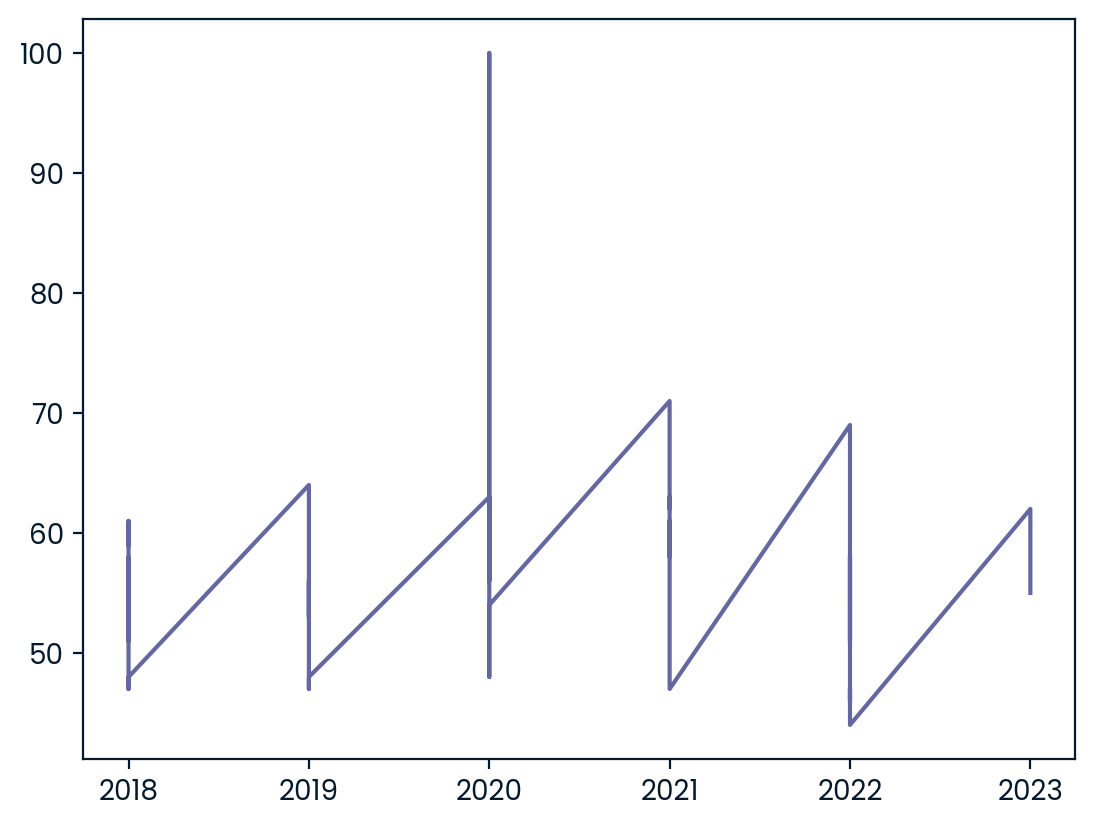

In [129]:
# plot x: year of global search | y: global search for 'workout'
plt.plot(df_workout["year"],df_workout["workout_worldwide"])
plt.show()

In [130]:
df_three_keywords

,month,home_workout_worldwide,gym_workout_worldwide,home_gym_worldwide
0,2018-03,12,16,10
1,2018-04,12,18,10
2,2018-05,13,16,9
3,2018-06,12,17,9
4,2018-07,12,17,9
...,...,...,...,...
56,2022-11,11,18,12
57,2022-12,11,16,11
58,2023-01,17,22,15
59,2023-02,14,21,12


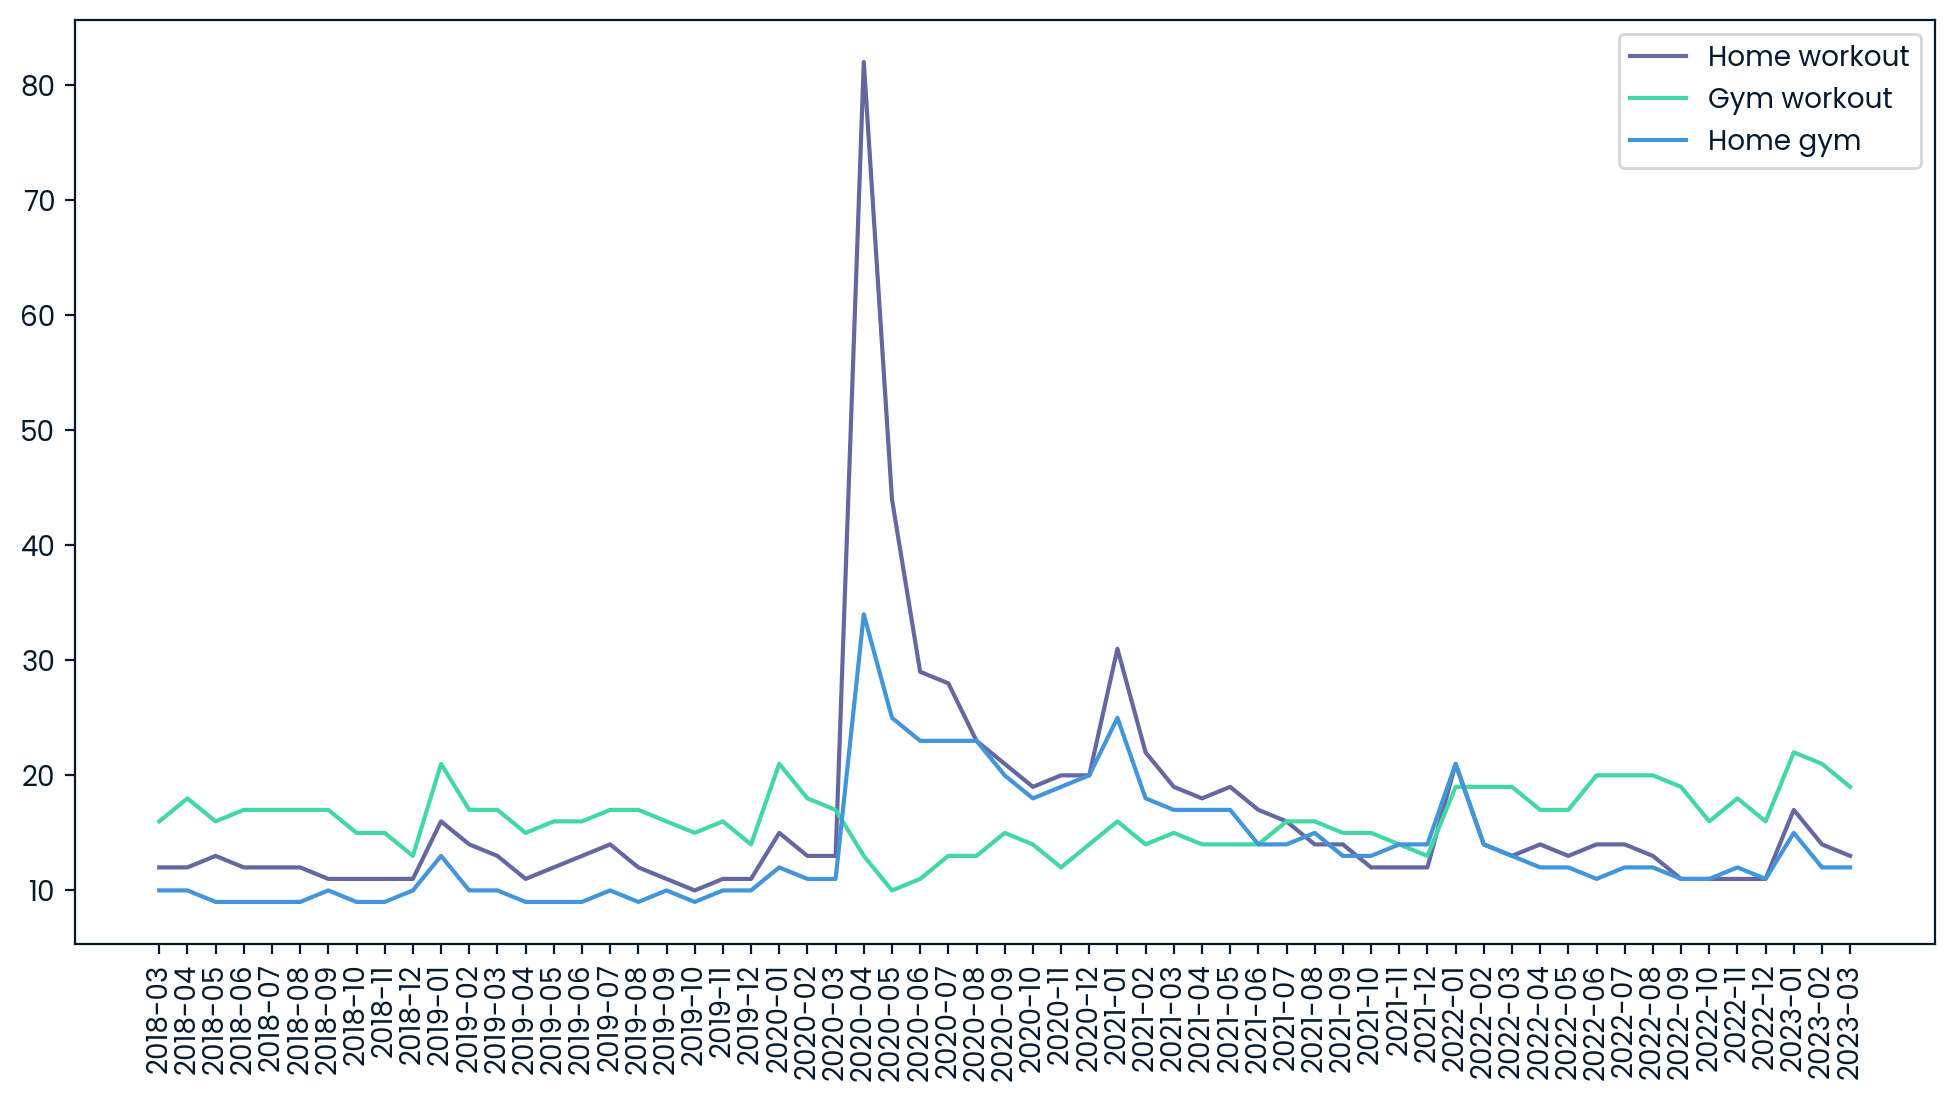

In [131]:
# Of the keywords available, what was the most popular during the covid pandemic, and what is the most popular now? Save your answers as variables called peak_covid and current respectively.
plt.figure(figsize=(12, 6))
plt.plot(df_three_keywords["month"], df_three_keywords["home_workout_worldwide"], label="Home workout")
plt.plot(df_three_keywords["month"], df_three_keywords["gym_workout_worldwide"], label="Gym workout")
plt.plot(df_three_keywords["month"], df_three_keywords["home_gym_worldwide"], label="Home gym")
plt.xticks(rotation=90)
plt.legend()
plt.show()

peak_covid = "home workout"
current = "gym workout"

In [132]:
df_three_keywords_geo

,Country,home_workout_2018_2023,gym_workout_2018_2023,home_gym_2018_2023
0,Gibraltar,NaN,NaN,NaN
1,Lesotho,NaN,NaN,NaN
2,Guam,NaN,NaN,NaN
3,Botswana,NaN,NaN,NaN
4,Brunei,NaN,NaN,NaN
...,...,...,...,...
245,Tokelau,NaN,NaN,NaN
246,Tuvalu,NaN,NaN,NaN
247,U.S. Outlying Islands,NaN,NaN,NaN
248,Vatican City,NaN,NaN,NaN


In [133]:
# You'd be interested in expanding your virtual home workouts offering to either the Philippines or Malaysia. Which of the two countries has the highest interest in home workouts? Identify the country and save it as home_workout_geo.

if df_three_keywords_geo[df_three_keywords_geo["Country"] == "Malaysia"].iloc[0,1] > df_three_keywords_geo[df_three_keywords_geo["Country"] == "Philippines"].iloc[0,1]:
    home_workout_geo = "Malaysia"
else:
    home_workout_geo = "Philippines"
    
home_workout_geo

'Philippines'

In [134]:
df_workout_geo

,country,workout_2018_2023
0,Guam,NaN
1,Falkland Islands (Islas Malvinas),NaN
2,Cook Islands,NaN
3,Brunei,NaN
4,Palau,NaN
...,...,...
245,Tokelau,NaN
246,Tuvalu,NaN
247,U.S. Outlying Islands,NaN
248,Vatican City,NaN


In [135]:
# What country has the highest interest for workouts among the following: United States, Australia, or Japan? Save your answer as top_country.
united_interest = df_workout_geo[df_workout_geo["country"] == "United States"].iloc[0,1]
australia_interest = df_workout_geo[df_workout_geo["country"] == "Australia"].iloc[0,1]
japan_interest = df_workout_geo[df_workout_geo["country"] == "Japan"].iloc[0,1]

max_interest = max(United_interest, Australia_interest, Japan_interest)

if max_interest == united_interest:
    top_country = "United States"
elif max_interest == Australia_interest:
    top_country = "Australia"
else:
    top_country = "Japan"
    
top_country

'United States'